#### TensorFlow



In [16]:
! pip install tensorflow

In [17]:
# Types of fomrats in tensor flow 
# inport libraries 
import numpy as np 
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
# Data Generation
observations = 1000
xs = np.random.uniform(-10, 10, (observations, 1))
zs = np.random.uniform(-10, 10, (observations, 1))
inputs = np.column_stack((xs, zs))
noise = np.random.uniform(-1,1, (observations, 1))
target = 2*xs - 3*zs + 5 + noise
np.savez('tensorintro',input = inputs,targets = target)

In [19]:
# Solving with TensorFlow
train_data = np.load('tensorintro.npz')

In [20]:
input_size = 2
output_size = 1
model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])
model.compile(optimizer = 'sgd',loss = 'mean_squared_error')


In [21]:
model.fit(train_data['input'], train_data['targets'], epochs = 100,verbose = 2)

Epoch 1/100
32/32 - 0s - loss: 24.2268 - 149ms/epoch - 5ms/step
Epoch 2/100
32/32 - 0s - loss: 4.7505 - 14ms/epoch - 436us/step
Epoch 3/100
32/32 - 0s - loss: 1.5218 - 14ms/epoch - 442us/step
Epoch 4/100
32/32 - 0s - loss: 0.6779 - 16ms/epoch - 485us/step
Epoch 5/100
32/32 - 0s - loss: 0.4450 - 15ms/epoch - 469us/step
Epoch 6/100
32/32 - 0s - loss: 0.3880 - 15ms/epoch - 467us/step
Epoch 7/100
32/32 - 0s - loss: 0.3714 - 14ms/epoch - 436us/step
Epoch 8/100
32/32 - 0s - loss: 0.3651 - 16ms/epoch - 499us/step
Epoch 9/100
32/32 - 0s - loss: 0.3637 - 14ms/epoch - 442us/step
Epoch 10/100
32/32 - 0s - loss: 0.3676 - 15ms/epoch - 483us/step
Epoch 11/100
32/32 - 0s - loss: 0.3643 - 15ms/epoch - 467us/step
Epoch 12/100
32/32 - 0s - loss: 0.3623 - 16ms/epoch - 499us/step
Epoch 13/100
32/32 - 0s - loss: 0.3666 - 14ms/epoch - 447us/step
Epoch 14/100
32/32 - 0s - loss: 0.3622 - 15ms/epoch - 468us/step
Epoch 15/100
32/32 - 0s - loss: 0.3583 - 15ms/epoch - 483us/step
Epoch 16/100
32/32 - 0s - loss: 0.

In [23]:
## Extract the weigths and bias from the model
weights = model.layers[0].get_weights()[0]
bais = model.layers[0].get_weights()[1]

In [25]:
print(weights)
print(bais)

[[ 2.0334644]
 [-3.0043094]]
[5.013265]


In [27]:
# Extract the outputs make prediction 
model.predict_on_batch(train_data['input']).round(1)

array([[-13.9],
       [ 19. ],
       [ -0.7],
       [-20.3],
       [ 18.9],
       [  8.1],
       [ -0.3],
       [-18.6],
       [ 42. ],
       [ 21.4],
       [-13.6],
       [ 18.5],
       [-15.7],
       [ 27.3],
       [-15.5],
       [-26.5],
       [-23.5],
       [ 19. ],
       [  8.3],
       [  3.3],
       [  1.8],
       [  2. ],
       [ 11.2],
       [ -8.3],
       [  5.8],
       [  3. ],
       [-17.3],
       [-24.8],
       [  9.8],
       [ -8.8],
       [ -5.5],
       [ 40.8],
       [ 17.8],
       [ -3.2],
       [ 10.3],
       [  4.7],
       [ 40.8],
       [ 14.8],
       [ -5.2],
       [ 21. ],
       [ -0.3],
       [-31. ],
       [ 17. ],
       [-14.9],
       [ 26.7],
       [ 44.8],
       [  6.8],
       [ 16.9],
       [ 21.9],
       [ 15. ],
       [  9.7],
       [ 18.8],
       [ 29.8],
       [ -8.8],
       [-24.9],
       [ 16.3],
       [  7.6],
       [-36.4],
       [ 15.6],
       [ 17.8],
       [  8.2],
       [ -8.9],
       [

In [28]:
train_data['targets'].round(1)

array([[-13.4],
       [ 19.8],
       [  0. ],
       [-19.8],
       [ 19.3],
       [  8.5],
       [ -1. ],
       [-19.1],
       [ 41.1],
       [ 21.6],
       [-12.7],
       [ 18.5],
       [-16.1],
       [ 26.3],
       [-15.2],
       [-26.7],
       [-23. ],
       [ 19.1],
       [  8.9],
       [  2.4],
       [  0.6],
       [  2.5],
       [ 10.8],
       [ -8.2],
       [  6.6],
       [  2.5],
       [-18. ],
       [-24.7],
       [  8.9],
       [ -8.4],
       [ -6. ],
       [ 39.9],
       [ 17.1],
       [ -3.5],
       [ 11.2],
       [  5.2],
       [ 39.8],
       [ 15.5],
       [ -5.5],
       [ 20.6],
       [  0.6],
       [-30.7],
       [ 17.2],
       [-13.7],
       [ 27.5],
       [ 44.7],
       [  7.6],
       [ 15.7],
       [ 22.6],
       [ 13.8],
       [ 10.2],
       [ 19.3],
       [ 29.4],
       [ -9.6],
       [-24.3],
       [ 16.3],
       [  7.2],
       [-36. ],
       [ 15.4],
       [ 18. ],
       [  7.6],
       [ -8.5],
       [

Text(0, 0.5, 'target')

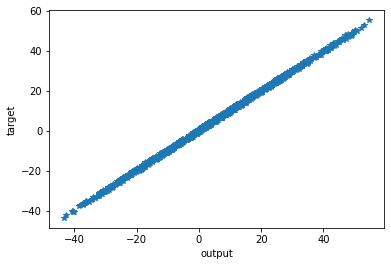

In [34]:
plt.plot(np.squeeze(model.predict_on_batch(train_data['input'])),np.squeeze(train_data['targets']),'*')
plt.xlabel('output')
plt.ylabel('target')

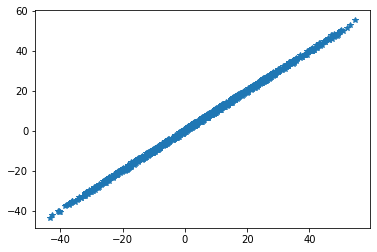

In [32]:
plt.plot(model.predict_on_batch(train_data['input']),train_data['targets'],'*')